In [3]:
from pathlib import Path
PATH = Path('../')
%load_ext autoreload
%autoreload 2

In [1]:
import sys
sys.path.insert(0, str(PATH))

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from src.data import munge_data
from src.viz import plot_feature_importance
from src.models import permutation_importance_df, gini_importance_df

In [4]:
class PermImpTester:
    def _read_data(self):
        self.train = pd.read_csv(PATH/'data/train.csv')
    
    def _munge_data(self):
        self.train = munge_data(self.train)
    
    def __init__(self):
        self.rf = None
        self._read_data()
        self._munge_data()
    
    def train_test_split(self, **kwargs):
        TARGET = ['Survived']
        self.X_train, self.X_test, self.y_train, self.y_test = \
        train_test_split(self.train.drop(columns=TARGET), self.train[TARGET], **kwargs)
        return self
    
    def add_noise_column(self):
        self.train['noise'] = np.random.random(size=len(self.train))
        return self
    
    def train_rf_classifier(self, **kwargs):
        self.rf = RandomForestClassifier(**kwargs)
        self.rf.fit(self.X_train, self.y_train)
        return self
    
    def plot_gini_feature_importance(self):
        fi_gini = gini_importance_df(self.rf, self.train.columns)
        return plot_feature_importance(fi_gini)
    
    def plot_permimp_feature_importance(self):
        fi_pi = permutation_importance_df(self.rf, self.X_test, self.y_test)
        return plot_feature_importance(fi_pi, has_std=True)

In [5]:
pi_1 = (PermImpTester().
        train_test_split(test_size=0.2, random_state=42)
        .train_rf_classifier(n_estimators=200))

/home/ubuntu/miniconda/envs/permimp/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


<BarContainer object of 9 artists>

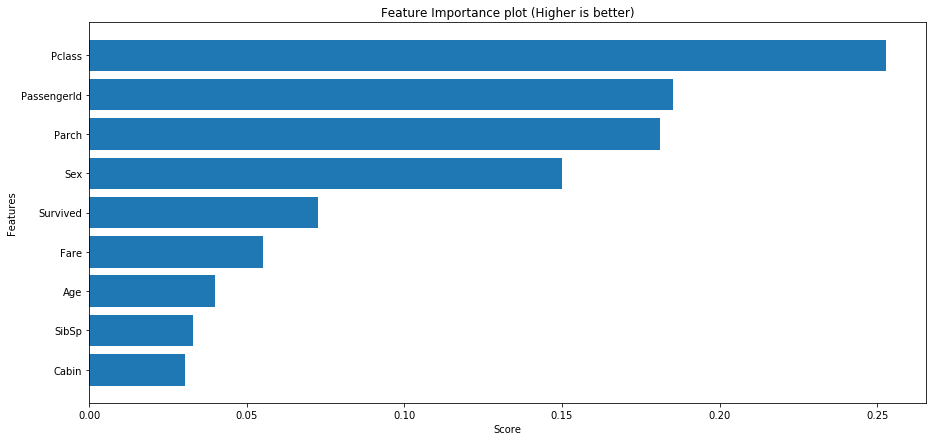

In [6]:
pi_1.plot_gini_feature_importance()

<BarContainer object of 9 artists>

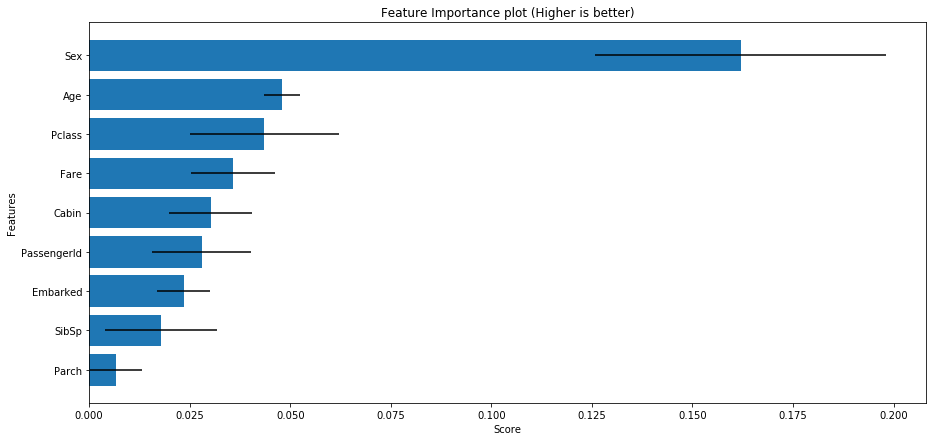

In [7]:
pi_1.plot_permimp_feature_importance()

In [8]:
pi_2 = (PermImpTester()
        .add_noise_column()
        .train_test_split(test_size=0.2, random_state=42)
        .train_rf_classifier(n_estimators=200))

/home/ubuntu/miniconda/envs/permimp/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


<BarContainer object of 10 artists>

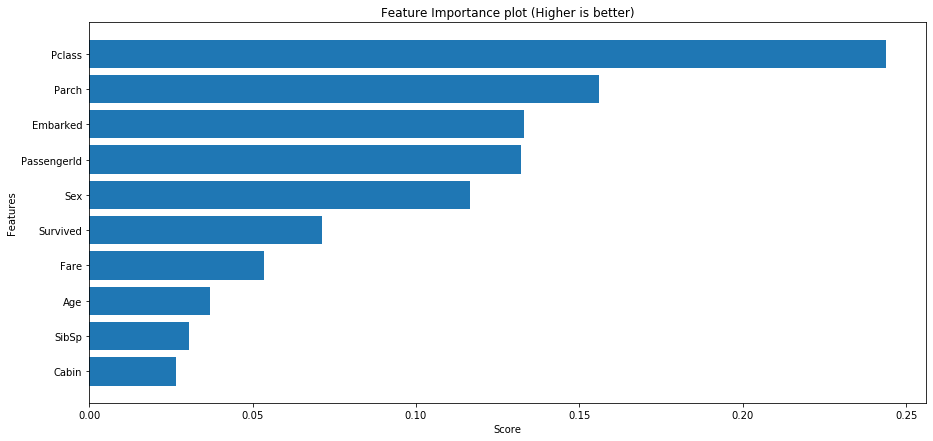

In [9]:
pi_2.plot_gini_feature_importance()

<BarContainer object of 10 artists>

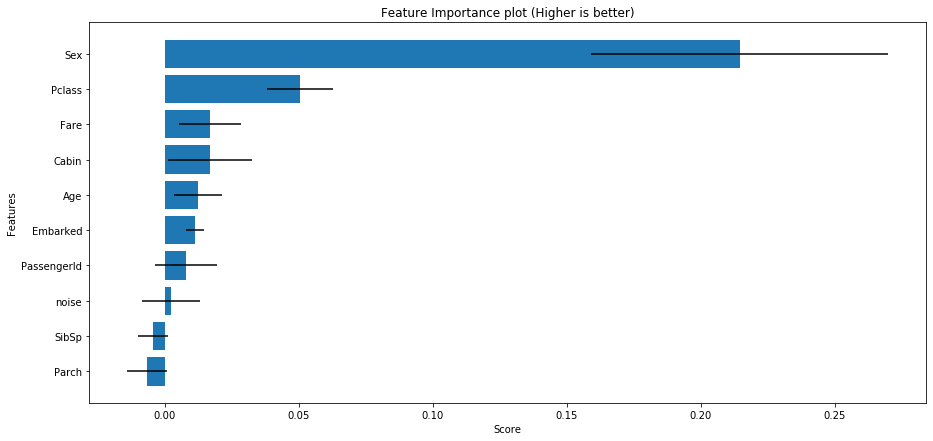

In [10]:
pi_2.plot_permimp_feature_importance()